### Асимптотическая нормальность

__________________
**Задача 1.** Пусть $X_1, ..., X_n$ --- выборка из распределения $U[0, \theta]$. Из домашнего задания известно, что $n\left(\theta - X_{(n)}\right) \stackrel{d_\theta}{\longrightarrow} Exp\left(1/\theta\right)$.  Вам нужно убедиться в этом, сгенерировав множество выборок, посчитав по каждой из них оценку $X_{(n)}$ параметра $\theta$ в зависимости от размера выборки и визуализировав рассматриваемое свойство.

Сгенерируйте множество выборок $X^1, \dots, X^{300}$ из распределения $U[0, 1]$:  $\; X^j = (X^j_1, \dots, X^j_{500}), 1 \leq j \leq 300$.<br>
По каждой из них посчитайте оценки  $\widehat{\theta}_{jn} = \max(X^j_1, \dots, X^j_n)$ для $1 \leq n \leq 500$,  то есть оценку параметра $\theta$ по первым $n$ наблюдениям $j$-й выборки.
Для этих оценок посчитайте статистики $T_{jn} = n \left( \theta - \widehat{\theta}_{jn} \right)$, где $\theta = 1$.

In [3]:
try:
    import numpy as np
    import scipy.stats as sps
    import matplotlib.pyplot as plt
except ImportError:
    print("you have some mistakes,which connected to import libraries")

In [4]:
%matplotlib inline

### 1.1 Посмотрим сначала для одной выборки

Сначала просто посмотрим как наша с вами оценка в виде n - ой порядковой статистики сходится к парметру равномерного распределения, которым является удвоенное мат.ожидание

In [16]:
sample = [] * (10**4)
theta = 10
unif = sps.uniform(loc = 0,scale = theta)
sample = unif.rvs(size=10000)
sample

array([ 2.1119757 ,  6.36177566,  3.58443846, ...,  4.56457261,
        0.72190064,  0.70613421])

In [17]:
maximum = [0]
n = 1
for x in sample:
    if(maximum[0] == 0):
        maxim = x
        maximum[0] = x
        n+=1
    else:
        maxim = max(x,maxim)
        maximum.append(maxim)
        n+=1        

In [12]:
maximum

[4.4747728890759717,
 6.2429950733108521,
 6.2429950733108521,
 6.6118750216494426,
 6.6118750216494426,
 6.6388402790069634,
 6.6388402790069634,
 6.6388402790069634,
 7.5461114108611262,
 7.5461114108611262,
 9.9558316188992748,
 9.9558316188992748,
 9.9558316188992748,
 9.9558316188992748,
 9.9558316188992748,
 9.9558316188992748,
 9.9558316188992748,
 9.9558316188992748,
 9.9558316188992748,
 9.9558316188992748,
 9.9558316188992748,
 9.9558316188992748,
 9.9558316188992748,
 9.9558316188992748,
 9.9558316188992748,
 9.9558316188992748,
 9.9558316188992748,
 9.9558316188992748,
 9.9558316188992748,
 9.9558316188992748,
 9.9558316188992748,
 9.9558316188992748,
 9.9558316188992748,
 9.9558316188992748,
 9.9558316188992748,
 9.9558316188992748,
 9.9558316188992748,
 9.9558316188992748,
 9.9558316188992748,
 9.9558316188992748,
 9.9558316188992748,
 9.9558316188992748,
 9.9558316188992748,
 9.9558316188992748,
 9.9558316188992748,
 9.9558316188992748,
 9.9558316188992748,
 9.9558316188

In [18]:
stat_1 = list()
n = list()
for i in range(10000):
    stat_1.append(maximum[i] - theta)
    n.append(i)    

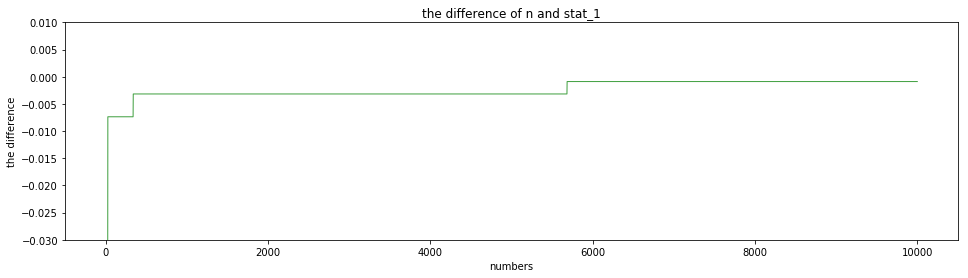

In [24]:
plt.figure(figsize = (16,4))
plt.plot(n,stat_1,'g-',lw=1,alpha = 0.75)
plt.xlabel("numbers")
plt.ylabel("the difference")
plt.title("the difference of n and stat_1")
plt.ylim(- 0.03,0.01)
plt.show()

Теперь пронаблюдав , что действительно такая статистика сходится к удвоенному мат.ожидания. Тогда теперь мы с вами давайте также для одной выборки, посчитаем к чему сойдется значение $n\left(\theta - X_{(n)}\right) \stackrel{d_\theta}{\longrightarrow} Exp\left(1/\theta\right)$

In [33]:
new_sample = [] *(10**4)
theta =10
unif =sps.uniform(loc = 0,scale = theta)
new_sample = unif.rvs(size = 10**4)
new_sample

array([ 0.99733045,  6.35336697,  2.53838484, ...,  2.23629082,
        0.6058782 ,  0.92232832])

In [34]:
asympth = [0]
n = 1
for x in new_sample:
    if(asympth[0] == 0):
        
        maximum = x
        asympth[0] = n * (theta - x)
        n+=1
        
 
    else:
        maximum = max(x,maximum)
        asympth.append(n*(theta - maximum))
        n+=1      

In [35]:
asympth

[9.0026695488890525,
 7.2932660660608573,
 10.939899099091285,
 14.586532132121715,
 18.233165165152144,
 16.218002223918806,
 18.921002594571938,
 21.624002965225074,
 24.32700333587821,
 27.030003706531343,
 23.346060692609953,
 25.468429846483584,
 27.590799000357215,
 29.71316815423085,
 31.835537308104481,
 29.15774337039079,
 30.980102331040214,
 32.802461291689639,
 34.624820252339063,
 36.447179212988488,
 38.269538173637912,
 40.091897134287336,
 41.914256094936761,
 43.736615055586185,
 45.558974016235609,
 47.381332976885034,
 26.534571774044878,
 27.517333691602097,
 28.500095609159317,
 29.482857526716533,
 30.465619444273749,
 31.448381361830968,
 32.431143279388188,
 33.413905196945407,
 34.39666711450262,
 35.379429032059839,
 9.6524573498295272,
 9.9133345755005955,
 10.174211801171664,
 10.435089026842732,
 10.6959662525138,
 10.956843478184869,
 11.217720703855937,
 11.478597929527005,
 11.739475155198074,
 12.000352380869142,
 12.26122960654021,
 12.522106832211279,

In [36]:
stat_2 = list()
n = list()
for i in range(10000):
    try:
        stat_2.append(asympth[i])
        n.append(i)    
    except IndexError as r:
        print("{} is here".format(r))

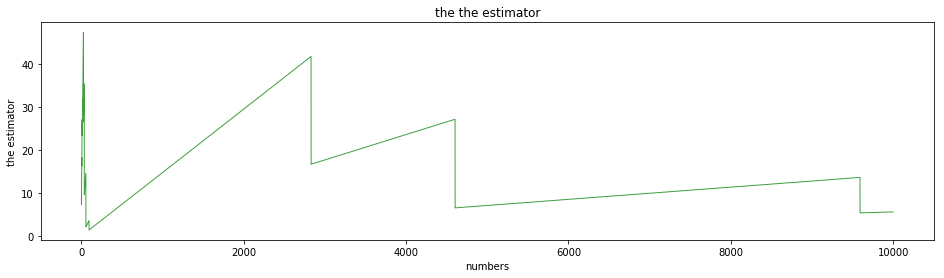

In [38]:
plt.figure(figsize = (16,4))
plt.plot(n,stat_2,'g-',lw=1,alpha = 0.75)
plt.xlabel("numbers")
plt.ylabel("the estimator")
plt.title("the the estimator")

plt.show()

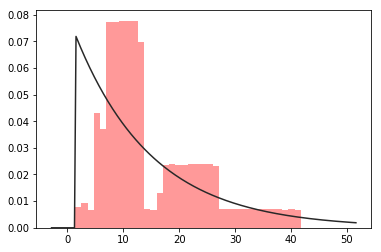

In [64]:
import seaborn as sns
sns.distplot(stat_2,kde=False,fit = sps.expon,color = 'red');

In [65]:
sns.distplot?

### 1.2  Теперь проделаем это для большого количества выборок

In [68]:
next_sample = np.random.uniform(0,1,(300,500))# generating 500 samples , which have the size is equal to 300
next_sample

array([[ 0.30495468,  0.91909874,  0.44457457, ...,  0.13328779,
         0.64826503,  0.70296513],
       [ 0.93396871,  0.34682798,  0.49841032, ...,  0.51806639,
         0.31518175,  0.21862362],
       [ 0.17930857,  0.97355116,  0.04895711, ...,  0.45323184,
         0.76421931,  0.83278263],
       ..., 
       [ 0.48760944,  0.47978549,  0.9215952 , ...,  0.72991016,
         0.34025541,  0.86745643],
       [ 0.36755319,  0.33414006,  0.07549928, ...,  0.5494934 ,
         0.03523293,  0.19880444],
       [ 0.64431885,  0.5250861 ,  0.3005234 , ...,  0.36917842,
         0.90644672,  0.34340962]])

In [70]:
i = 0
z_n = np.random.uniform(0,1,(300,500))
for x in next_sample:
    n = 1
    asympth = [0]
    for y in x:
        if(asympth[0] == 0):
        
            maximum = y
            asympth[0] = n * (theta - y)
            n+=1
        
 
        else:
            maximum = max(y,maximum)
            asympth.append(n*(theta - maximum))
            n+=1      
    z_n[i] = asympth     
    i+=1     
           

In [71]:
z_n

array([[    9.69504532,    18.16180253,    27.24270379, ...,
         4482.86026224,  4491.86198967,  4500.86371711],
       [    9.06603129,    18.13206258,    27.19809387, ...,
         4482.60282119,  4491.60403168,  4500.60524216],
       [    9.82069143,    18.05289769,    27.07934653, ...,
         4482.21060368,  4491.21102658,  4500.21144948],
       ..., 
       [    9.51239056,    19.02478113,    27.2352144 , ...,
         4482.13091958,  4491.13118247,  4500.13144536],
       [    9.63244681,    19.26489362,    28.89734043, ...,
         4482.78014381,  4491.78171037,  4500.78327692],
       [    9.35568115,    18.71136229,    28.06704344, ...,
         4482.28851077,  4491.28909011,  4500.28966945]])

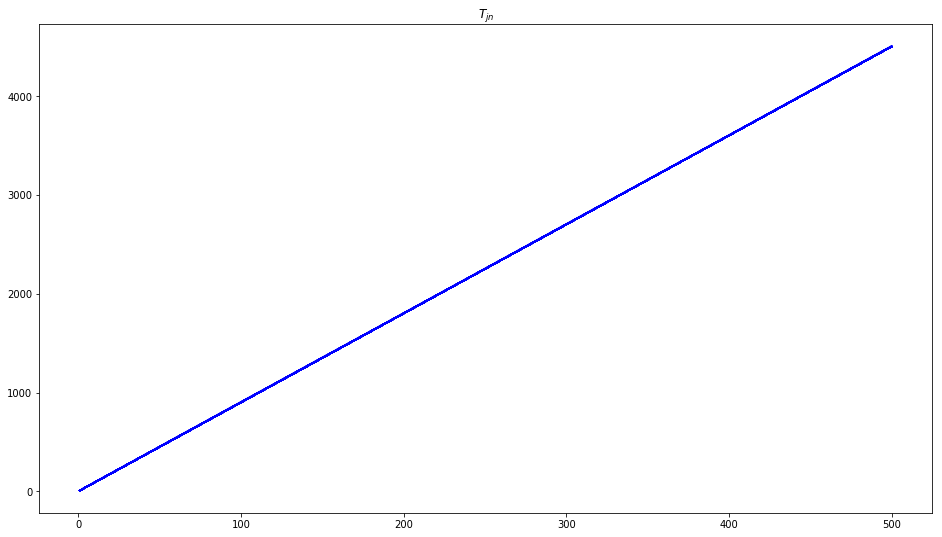

In [74]:
def ploting_T ():
    plt.figure(figsize = (16, 9))
    plt.title("$T_{jn}$")
    
    for i in range(300):
        plt.plot(np.arange(500) + 1, z_n[i], color = "blue", alpha = 0.2)
    
    plt.legend()
    plt.show()
    return

ploting_T ()

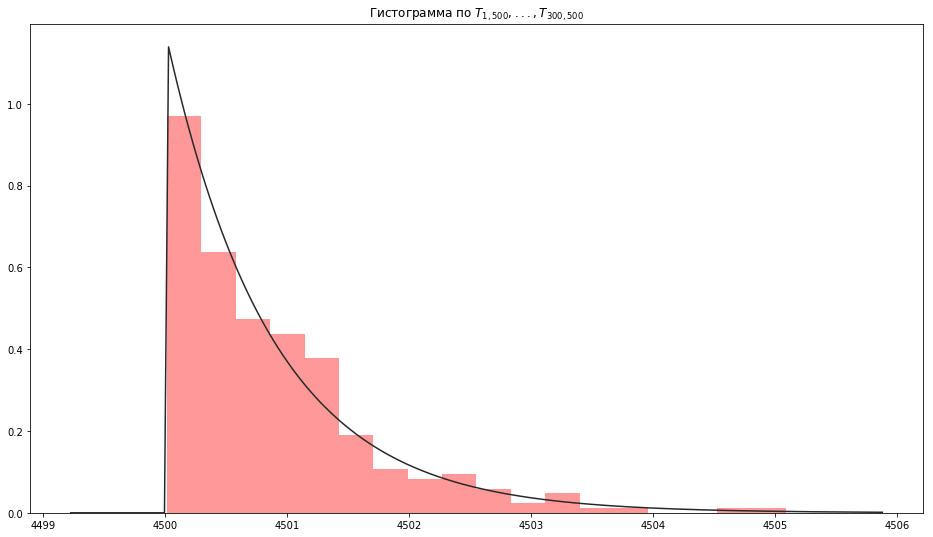

In [62]:
import seaborn as sns
t_last = np.hsplit(z_n, (499, 500))[1]

def comp_with_exp ():
    
    plt.figure(figsize = (16, 9))
    plt.title("Гистограмма по $T_{1,500}, ..., T_{300,500}$")
    
    sns.distplot(t_last, kde = False, fit = sps.expon, color='red')
    return

comp_with_exp ()

Хорошо ли гистограмма приближает плотность распределения $Exp(1)$? Подтверждают ли проведенные эксперименты свойство $n\left(\theta - X_{(n)}\right) \stackrel{d_\theta}{\longrightarrow} Exp\left(1/\theta\right)$? Что можно сказать в сравнении с оценкой, рассмотренной в предыдущей задаче?

**Вывод: ** Гистограмма хорошо приближает $Exp(1)$. Значит проведенные эксперименты подтверждают свойство $n\left(\theta - X_{(n)}\right) \stackrel{d_\theta}{\longrightarrow} Exp\left(1/\theta\right)$. Оценка $X_{(n)}$ сходится побыстрее.

In [5]:
import string
out = 'C:\\idea_projects_my\\first_orifind\\my_file'
with open(out,'r') as myfile:
    data = myfile.read()

In [6]:
data

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.
